# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the data

In [2]:
df=pd.read_csv('College.csv',index_col=0)

# Exploratory Data Analysis

In [3]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
df.shape

(777, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [6]:
df.isnull().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

There are no missing values in the dataset

In [7]:
df.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

# Visualisations

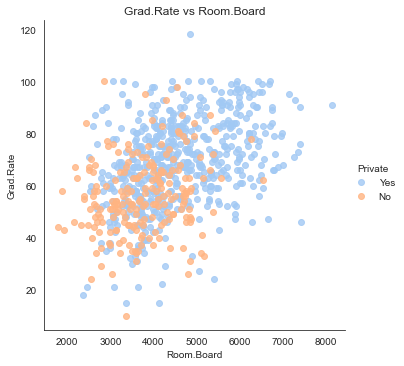

In [8]:
sns.set_style('white')
sns.lmplot('Room.Board','Grad.Rate',hue='Private',data=df,fit_reg=False,palette='pastel')
plt.title('Grad.Rate vs Room.Board')
plt.show()

From the scatterplot, we can infer that Private Colleges tend to be on the higher end of Graduation Rate and Room Board as compared to Public Colleges.

C:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


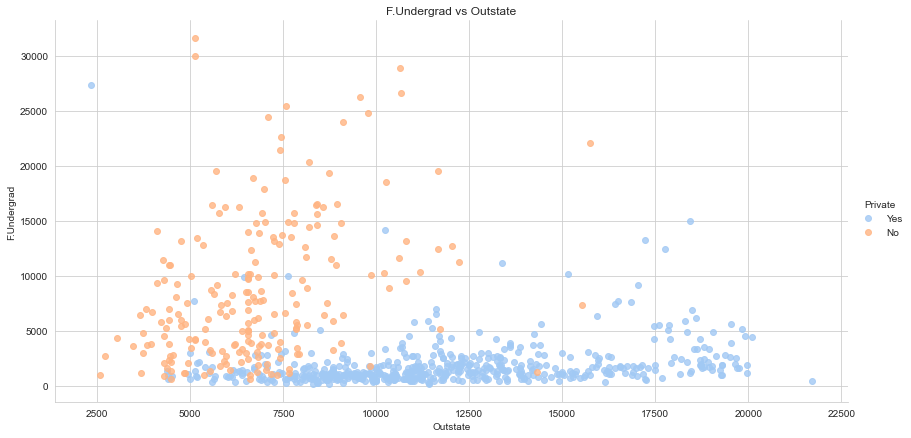

In [9]:
sns.set_style('whitegrid')
sns.lmplot('Outstate','F.Undergrad',data=df,hue='Private',palette='pastel',fit_reg=False,size=6,aspect=2)
plt.title('F.Undergrad vs Outstate')
plt.show()

Private Colleges tend to have a higher amount of Outstate Students pursuing Undergraduation, Public Colleges follow an opposite trend with less Outstate Students pursuing Undergraduation. 

C:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


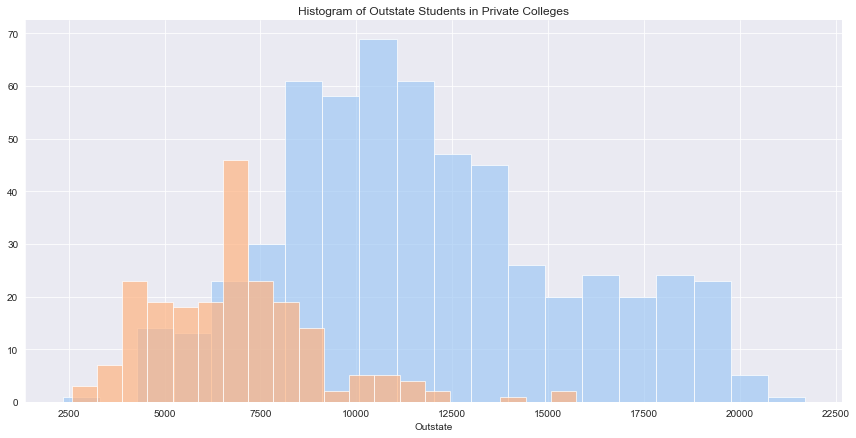

In [10]:
sns.set_style('darkgrid')
a=sns.FacetGrid(df,hue='Private',palette='pastel',size=6,aspect=2)
a=a.map(plt.hist,'Outstate',bins=20,alpha=0.7)
plt.title('Histogram of Outstate Students in Private Colleges')
plt.show()

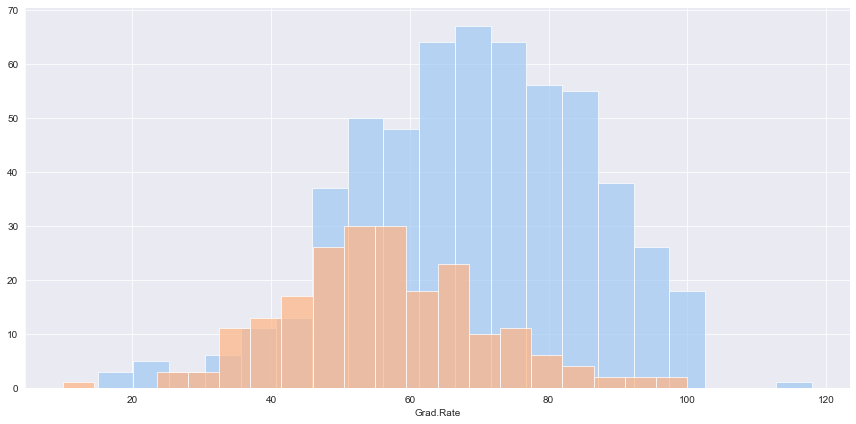

In [11]:
sns.set_style('darkgrid')
b=sns.FacetGrid(df,hue='Private',palette='pastel',size=6,aspect=2)
b=b.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

There seems to be mistake as we see a college has a Graduation Rate more than 100%.

In [12]:
df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


We should set its Graduation Rate to 100% as its the maximum value achievable.

In [13]:
df['Grad.Rate']['Cazenovia College'] = 100

<ipython-input-13-bc95ac68ab2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grad.Rate']['Cazenovia College'] = 100


In [14]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


We have set the Graduation Rate to 100% for Cazenovia College
.

C:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Histogram for Graduation Rates')

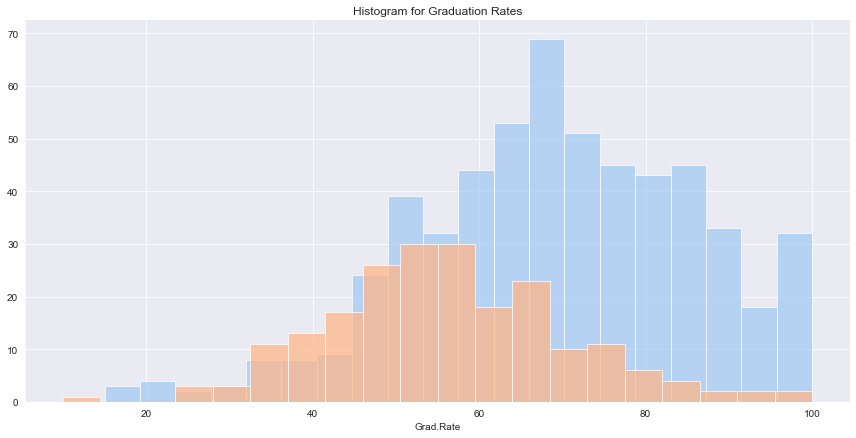

In [15]:
sns.set_style('darkgrid')
c=sns.FacetGrid(df,hue='Private',palette='pastel',size=6,aspect=2)
c=c.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)
plt.title('Histogram for Graduation Rates')

# Creating the Clusters

In [16]:
from sklearn.cluster import KMeans

In [17]:
kmeans=KMeans(n_clusters=2)

In [18]:
kmeans.fit(df.drop('Private',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# Evaluation 

In [19]:
def convertor(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [20]:
df['Cluster']=df['Private'].apply(convertor)

In [21]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [22]:
df[['Cluster','Private']]

,Cluster,Private
Abilene Christian University,1,Yes
Adelphi University,1,Yes
Adrian College,1,Yes
Agnes Scott College,1,Yes
Alaska Pacific University,1,Yes
...,...,...
Worcester State College,0,No
Xavier University,1,Yes
Xavier University of Louisiana,1,Yes
Yale University,1,Yes


In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(classification_report(df['Cluster'],kmeans.labels_))

              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



In [25]:
confusion_matrix(df['Cluster'],kmeans.labels_)

array([[ 74, 138],
       [ 34, 531]], dtype=int64)